In [2]:
import matplotlib as mpl
import seaborn as sb
mpl.rcParams['agg.path.chunksize'] = 100000
import pandas as pd
import numpy as np
data= pd.read_csv('Training_data.csv')

In [3]:
data.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday.1,Type,Size
0,1,1,2/5/2010,24924.50,0,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,0,A,151315
1,1,1,2/12/2010,46039.49,1,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,1,A,151315
2,1,1,2/19/2010,41595.55,0,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,0,A,151315
3,1,1,2/26/2010,19403.54,0,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,0,A,151315
4,1,1,3/5/2010,21827.90,0,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,0,A,151315


In [4]:
#Spliting data in to test and training data
from sklearn import model_selection
test_size= 0.3
seed= 6
X= data.drop("Weekly_Sales", 1)
Y= data['Weekly_Sales']

x_train, x_test, y_train, y_test= model_selection.train_test_split(X,Y,test_size = test_size, random_state= seed)


#to convert series to dataframe
dataframe_ytrain = y_train.to_frame() 
dataframe_ytest= y_test.to_frame()
#print(testdata)

In [8]:
#log transform
y_train= y_train.transform(np.log)

170617    4.305561
158052    4.342506
118966    4.582043
201923    3.805146
28407     3.111756
62724     3.209917
143717    3.484879
9017      4.886531
20298     4.301373
255352    4.213469
218977    4.393817
218998    4.378964
63274     3.604133
297597    3.589062
186949    4.186270
164256    3.100715
210857    2.964863
39799     4.184983
65155     3.092201
135014    3.943000
299062    4.759449
271907    3.238177
212810    1.320977
281878    3.200714
144201    3.215638
125179    4.120511
57373     3.591414
263534    3.933277
125220    4.231875
54352     4.006159
            ...   
24149     2.616213
108691    3.901113
92479     3.454235
170111    3.618013
199874    3.138599
75344     4.254289
39998     4.116963
28133     3.258014
133764    3.590854
234929    4.454602
124389    1.303628
201643    3.636596
159346    4.006401
15833     3.914780
145935    3.889975
46490     2.324694
5083      3.470932
290772    1.613736
181512    3.673554
34721     4.892847
133444    3.671633
60014     4.

In [5]:
def merge_x_ytrain(x_train, y_train):
    train_data= x_train
    train_data['Weekly_Sales']= y_train
    return train_data;

train_data= merge_x_ytrain(x_train,y_train); 

train_data.head()

#print(len(dataframe_ytrain))
#print(len(dataframe_ytest))
# print(len(x_train))
# print(len(x_test))


C:\Users\Swati Gupta\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Store,Dept,Date,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday.1,Type,Size,Weekly_Sales
170617,18,25,6/4/2010,0,80.69,2.705,0.00,0.0,0.00,0.00,0.00,211.176428,7.808,0,A,120653,20209.75
158052,17,5,5/28/2010,0,80.44,2.759,0.00,0.0,0.00,0.00,0.00,210.896761,7.808,0,B,93188,22004.20
118966,13,10,7/1/2011,0,85.55,3.524,0.00,0.0,0.00,0.00,0.00,215.184137,7.962,0,A,219622,38198.25
201923,21,32,6/15/2012,0,79.35,3.393,5621.99,109.6,0.25,2420.28,3083.26,221.762642,7.143,0,A,140167,6384.78
28407,3,85,5/25/2012,0,77.22,3.561,4039.39,0.0,745.19,1429.96,3631.13,221.744944,7.143,0,B,37392,1293.47


In [6]:
#to check null values
lst=[]
for index, rows in x_train.iterrows():
    if rows.isnull == 'True':
        lst.append(x_train)
print(lst)

[]


In [7]:
#to check the mean and standard deviation of weekly status
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pylab as pl
def get_normal_distribution_value(column, training_data):
    Ws= training_data[column]
    mean_data= np.mean(Ws)
    stnd= np.std(Ws)
    print("Mean is :",mean_data)
    print("Standard deviation is:", stnd)
    distribution_plot = stats.norm.pdf(Ws, mean_data, stnd) #pdf is prbability density function that is use in normal distribution
    pl.plot(Ws,distribution_plot)
    pl.show()
    z_scores=stats.zscore(Ws) 
    return z_scores;

In [8]:
#to calculate cumulative distribution function

def get_cumulative_distribution_value(column, training_data):
    Ws= training_data[column]
    mean_data= np.mean(Ws)
    stnd= np.std(Ws)
    print("Mean is :",mean_data)
    print("Standard deviation is:", stnd)
    distribution_plot = stats.norm.cdf(Ws, mean_data, stnd) #pdf is prbability density function that is use in normal distribution
    pl.plot(Ws,distribution_plot)
    pl.show()

In [9]:
def remove_outlier(column, training_data):
    cleandata_after_outlierremoval= training_data[(training_data[column]<=3) & (training_data[column]>=-3)]
    return cleandata_after_outlierremoval

  

Mean is : 16997.87600036228
Standard deviation is: 23821.033640340058


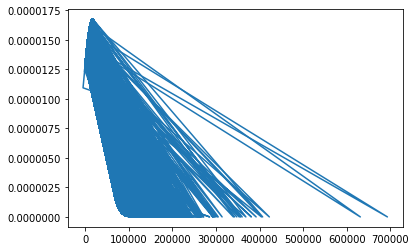

C:\Users\Swati Gupta\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [10]:
#to_check_outlier_fuel= get_normal_distribution_value('Fuel_Price', x_train)
z_scores= get_normal_distribution_value('Weekly_Sales', train_data)
train_data['Weekly_Sales_z_scores']= z_scores

clean_data= remove_outlier('Weekly_Sales_z_scores', train_data)
del clean_data['Weekly_Sales_z_scores']
#clean_data.head()
y_train= clean_data['Weekly_Sales']
x_train= clean_data
del x_train['Weekly_Sales']




Mean is : 14777.401432745804
Standard deviation is: 17659.284916695815


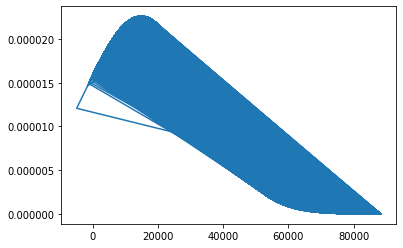

In [11]:
z_scores= get_normal_distribution_value('Weekly_Sales', y_train.to_frame())

In [12]:
# #to calculate IQR
# Q1 = train_data.quantile(0.25)
# Q3 = train_data.quantile(0.75)
# IQR = Q3 - Q1
# print(IQR)

# #to check with IQR whether outlier is there in data or not. If true then outlier is there and false means no outlier
# train_data = merge_x_ytrain(x_train, y_train)
# iqr_outlier_check= (train_data < (Q1 - 1.5 * IQR)) |(train_data > (Q3 + 1.5 * IQR))
# print(iqr_outlier_check)


# #To remove outlier by IQR
# iqr_outlier_remove = train_data[~((train_data < (Q1 - 1.5 * IQR)) |(train_data > (Q3 + 1.5 * IQR))).any(axis=1)]
# iqr_outlier_remove.shape

# print(len(iqr_outlier_remove))

# print(len(train_data))


In [13]:
# doing one hot endoing(to convert Type- A and B to number(0,1)) first and with (drop_first= True)--dummies encoding done to reduce features.
#to convert date to days
def feature_engineering(data):
    data['Type']= pd.get_dummies(data['Type'], prefix= 'Type', drop_first= True)
    data['difference_in_current_date']= pd.to_datetime('now')- pd.to_datetime(data['Date'])
    data['difference_from_current_date'] = data['difference_in_current_date'].dt.days
    del data['difference_in_current_date']
    del data['Date']
#backward selection sort of
#     del data['MarkDown1']
#     del data['Temperature']
#     del data['CPI']
#     del data['Unemployment']






In [14]:
x_train.head()

,Store,Dept,Date,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday.1,Type,Size
170617,18,25,6/4/2010,0,80.69,2.705,0.00,0.0,0.00,0.00,0.00,211.176428,7.808,0,A,120653
158052,17,5,5/28/2010,0,80.44,2.759,0.00,0.0,0.00,0.00,0.00,210.896761,7.808,0,B,93188
118966,13,10,7/1/2011,0,85.55,3.524,0.00,0.0,0.00,0.00,0.00,215.184137,7.962,0,A,219622
201923,21,32,6/15/2012,0,79.35,3.393,5621.99,109.6,0.25,2420.28,3083.26,221.762642,7.143,0,A,140167
28407,3,85,5/25/2012,0,77.22,3.561,4039.39,0.0,745.19,1429.96,3631.13,221.744944,7.143,0,B,37392


C:\Users\Swati Gupta\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Mean is : 14777.401432745804
Standard deviation is: 17659.284916695815


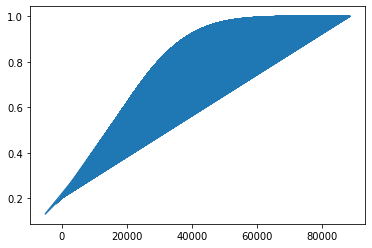

In [15]:
train_data= merge_x_ytrain(x_train, y_train)
get_cumulative_distribution_value('Weekly_Sales', train_data)

In [16]:
feature_engineering(x_train)


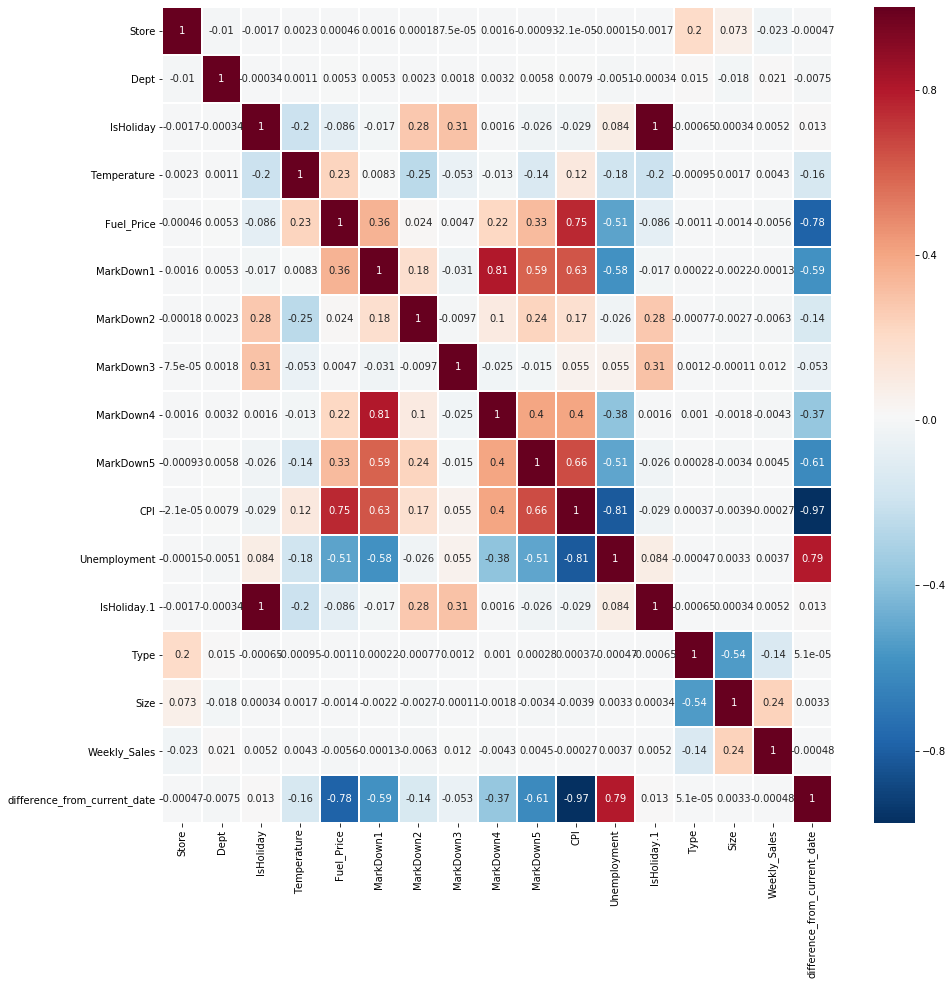

In [17]:
def find_pearson_heat_map(training_data):
    pearsoncorr = pd.DataFrame(training_data).corr(method='pearson')
    plt.figure(figsize=(15, 15))
    sb.heatmap(pearsoncorr, 
                xticklabels=pearsoncorr.columns,
                yticklabels=pearsoncorr.columns,
                cmap='RdBu_r',
                annot=True,
                linewidth=1)
    
find_pearson_heat_map(x_train)
del x_train['Weekly_Sales']

In [18]:
# Having STANDARD SCALER scaling
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
scaled_df = scaler.fit_transform(x_train)
min_max_scaled_train_x=pd.DataFrame(scaled_df)
min_max_scaled_train_x

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.254107,-0.604059,-0.273775,0.875904,-1.212682,-0.525837,-0.193999,-0.091844,-0.336401,-0.581475,-1.115231,0.518599,-0.273775,-0.967879,-0.432038,1.309612
1,0.140177,-1.282359,-0.273775,0.858272,-1.085794,-0.525837,-0.193999,-0.091844,-0.336401,-0.581475,-1.179681,0.518599,-0.273775,1.033187,-0.919901,1.333803
2,-0.315541,-1.112784,-0.273775,1.218659,0.711798,-0.525837,-0.193999,-0.091844,-0.336401,-0.581475,-0.191636,0.920037,-0.273775,-0.967879,1.325958,-0.045069
3,0.595896,-0.366654,-0.273775,0.781399,0.403975,0.496916,-0.169705,-0.091790,0.272235,0.415205,1.324409,-1.214884,-0.273775,-0.967879,-0.085409,-1.254605
4,-1.454837,1.430841,-0.273775,0.631179,0.798740,0.209009,-0.193999,0.069117,0.023196,0.592306,1.320331,-1.214884,-0.273775,1.033187,-1.911011,-1.182033
5,-0.999118,-0.468399,-0.273775,-1.998731,-1.661493,-0.525837,-0.193999,-0.091844,-0.336401,-0.581475,-1.089255,1.295407,-0.273775,1.033187,-1.319127,1.672473
6,-0.087682,0.040326,-0.273775,-1.708870,-0.481897,-0.525837,-0.193999,-0.091844,-0.336401,-0.581475,-0.965250,0.346554,-0.273775,-0.967879,-0.377256,0.511318
7,-1.682696,1.600416,-0.273775,1.234175,1.010222,-0.525837,-0.193999,-0.091844,-0.336401,-0.581475,-0.136756,0.920037,-0.273775,-0.967879,0.112614,-0.117641
8,-1.568766,1.871736,3.652632,-2.098878,-1.581600,-0.525837,-0.193999,-0.091844,-0.336401,-0.581475,-1.100080,1.295407,3.652632,-0.967879,1.018390,1.696664
9,1.165544,1.498671,-0.273775,0.332854,1.376790,-0.525837,-0.193999,-0.091844,-0.336401,-0.581475,-0.128084,0.190149,-0.273775,-0.967879,0.133894,0.196839


In [19]:
# Having min max scaling
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()
scaled_df = scaler.fit_transform(x_train)
min_max_train_x=pd.DataFrame(scaled_df)
min_max_train_x

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.566667,0.244898,0.0,0.805156,0.137114,0.000000,0.000000,0.000000,0.000000,0.000000,0.064013,0.805610,0.0,0.0,0.464300,0.880282
1,0.533333,0.040816,0.0,0.800711,0.175879,0.000000,0.000000,0.000000,0.000000,0.000000,0.042675,0.805610,0.0,1.0,0.315637,0.887324
2,0.400000,0.091837,0.0,0.891556,0.725054,0.000000,0.000000,0.000000,0.000000,0.000000,0.369785,0.906067,0.0,0.0,1.000000,0.485915
3,0.666667,0.316327,0.0,0.781333,0.631012,0.162593,0.002382,0.000004,0.074691,0.150584,0.871700,0.371820,0.0,0.0,0.569925,0.133803
4,0.066667,0.857143,0.0,0.743467,0.751615,0.116823,0.000000,0.013353,0.044129,0.177342,0.870349,0.371820,0.0,1.0,0.013624,0.154930
5,0.200000,0.285714,0.0,0.080533,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.072612,1.000000,0.0,1.0,0.193984,0.985915
6,0.466667,0.438776,0.0,0.153600,0.360373,0.000000,0.000000,0.000000,0.000000,0.000000,0.113667,0.762557,0.0,0.0,0.480993,0.647887
7,0.000000,0.908163,0.0,0.895467,0.816224,0.000000,0.000000,0.000000,0.000000,0.000000,0.387955,0.906067,0.0,0.0,0.630267,0.464789
8,0.033333,0.989796,1.0,0.055289,0.024408,0.000000,0.000000,0.000000,0.000000,0.000000,0.069028,1.000000,1.0,0.0,0.906277,0.992958
9,0.833333,0.877551,0.0,0.668267,0.928212,0.000000,0.000000,0.000000,0.000000,0.000000,0.390825,0.723418,0.0,0.0,0.636752,0.556338


In [20]:
correlation_df = x_train.corr()


In [21]:
correlation_df

,Store,Dept,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday.1,Type,Size,difference_from_current_date
Store,1.000000,-0.010013,-0.001742,0.002344,0.000462,0.001581,0.000180,0.000075,0.001626,-0.000935,-0.000021,-0.000153,-0.001742,0.201130,0.073380,-0.000475
Dept,-0.010013,1.000000,-0.000335,0.001150,0.005306,0.005275,0.002315,0.001796,0.003220,0.005830,0.007860,-0.005148,-0.000335,0.014882,-0.017691,-0.007536
IsHoliday,-0.001742,-0.000335,1.000000,-0.201853,-0.086033,-0.017220,0.276672,0.305459,0.001558,-0.026126,-0.029166,0.083967,1.000000,-0.000648,0.000339,0.013473
Temperature,0.002344,0.001150,-0.201853,1.000000,0.230152,0.008315,-0.253857,-0.053154,-0.012687,-0.139607,0.119748,-0.182178,-0.201853,-0.000946,0.001721,-0.156231
Fuel_Price,0.000462,0.005306,-0.086033,0.230152,1.000000,0.357778,0.023981,0.004696,0.219101,0.326970,0.754829,-0.514895,-0.086033,-0.001055,-0.001385,-0.781461
MarkDown1,0.001581,0.005275,-0.017220,0.008315,0.357778,1.000000,0.179814,-0.031493,0.806655,0.593705,0.632338,-0.581553,-0.017220,0.000219,-0.002229,-0.587084
MarkDown2,0.000180,0.002315,0.276672,-0.253857,0.023981,0.179814,1.000000,-0.009655,0.103727,0.235851,0.171735,-0.026390,0.276672,-0.000770,-0.002726,-0.143854
MarkDown3,0.000075,0.001796,0.305459,-0.053154,0.004696,-0.031493,-0.009655,1.000000,-0.025021,-0.015119,0.054902,0.054523,0.305459,0.001204,-0.000108,-0.053133
MarkDown4,0.001626,0.003220,0.001558,-0.012687,0.219101,0.806655,0.103727,-0.025021,1.000000,0.402818,0.401568,-0.384203,0.001558,0.001030,-0.001808,-0.372014
MarkDown5,-0.000935,0.005830,-0.026126,-0.139607,0.326970,0.593705,0.235851,-0.015119,0.402818,1.000000,0.659953,-0.507421,-0.026126,0.000284,-0.003420,-0.612114


In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
linreg = LinearRegression()
linreg.fit(min_max_scaled_train_x, y_train)
cv_4_results = cross_val_score(linreg, min_max_scaled_train_x, y_train, cv=10, 
 scoring="r2")

In [23]:
cv_4_results

array([0.06338359, 0.06369334, 0.06341198, 0.06195741, 0.0616188 ,
       0.05736398, 0.06320302, 0.06498337, 0.06410464, 0.05996547])

In [24]:
feature_engineering(x_test)

scaler = preprocessing.StandardScaler()
scaled_df = scaler.fit_transform(x_test)
min_max_scaled_test_x=pd.DataFrame(scaled_df)
y_pred = linreg.predict(min_max_scaled_test_x)


C:\Users\Swati Gupta\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\Swati Gupta\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\Swati Gupta\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: htt

In [25]:
#feature_engineering(x_test)

scaler = preprocessing.MinMaxScaler()
scaled_df = scaler.fit_transform(x_test)
min_max_test_x=pd.DataFrame(scaled_df)
y_pred = linreg.predict(min_max_test_x)

In [26]:
from sklearn.metrics import mean_squared_error, r2_score
print(mean_squared_error(y_test, y_pred))
print(r2_score(y_test, y_pred))

556931893.0727087
0.026106015932023552


In [27]:
min_max_scaled_test_x

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,1.057196,1.028500,-0.277011,0.472294,1.167320,2.580436,-0.192915,-0.090383,0.042969,1.991091,1.521078,-1.848781,-0.277011,1.035151,-0.318504,-1.577600
1,-0.880348,0.189724,3.609959,-0.261730,-1.137053,-0.525277,-0.194474,-0.094319,-0.336800,-0.578565,-0.980631,0.593160,3.609959,-0.966043,0.160908,0.702796
2,-0.082536,-0.045133,-0.277011,-0.511790,0.963165,2.260867,0.154972,-0.092057,5.994110,2.015168,1.120666,-0.693454,-0.277011,-0.966043,-0.396181,-0.898333
3,-0.766375,-1.320072,-0.277011,0.856516,-1.080734,-0.525277,-0.194474,-0.094319,-0.336800,-0.578565,-1.177301,0.514388,-0.277011,1.035151,-0.358925,1.333545
4,-0.082536,0.357480,-0.277011,1.114302,-1.367021,-0.525277,-0.194474,-0.094319,-0.336800,-0.578565,-1.048675,0.514388,-0.277011,-0.966043,-0.396181,1.260766
5,1.627062,1.565317,3.609959,-1.391917,-0.648958,-0.525277,-0.194474,-0.094319,-0.336800,-0.578565,-1.059953,0.593160,3.609959,1.035151,-1.831503,0.581499
6,-0.310482,1.733072,-0.277011,-0.982409,0.165317,-0.315169,0.046672,-0.085103,-0.334057,-0.185632,0.943043,-0.693454,-0.277011,-0.966043,1.308184,-0.777036
7,1.627062,1.699521,-0.277011,0.954854,-1.359981,-0.525277,-0.194474,-0.094319,-0.336800,-0.578565,-1.068042,0.459247,-0.277011,1.035151,-1.831503,1.115209
8,0.601303,-0.649052,-0.277011,-0.772386,0.787169,1.161705,1.488391,-0.093648,-0.032627,2.039595,1.071909,-0.693454,-0.277011,-0.966043,-0.104136,-0.874074
9,-0.766375,-1.185868,-0.277011,0.779953,0.407018,0.489118,-0.170064,-0.094266,0.266668,0.412702,1.331866,-1.231731,-0.277011,1.035151,-0.358925,-1.262226


In [29]:
x_test.head()

,Store,Dept,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday.1,Type,Size,difference_from_current_date
244772,25,74,0,74.97,3.717,17212.52,7.0,18.79,1523.11,7992.72,222.582019,6.908,0,1,128107,2802
74809,8,49,1,64.52,2.735,0.00,0.0,0.00,0.00,0.00,211.748433,7.838,1,0,155078,3460
143630,15,42,0,60.96,3.630,15441.40,1569.0,10.80,25390.88,8067.61,220.848045,7.348,0,0,123737,2998
79102,9,4,0,80.44,2.759,0.00,0.0,0.00,0.00,0.00,210.896761,7.808,0,1,125833,3642
144471,15,54,0,84.11,2.637,0.00,0.0,0.00,0.00,0.00,211.453772,7.808,0,0,123737,3621


In [30]:
from sklearn import neighbors
from math import sqrt


In [31]:
#Knn prediction using standard scaler
KNN_list = [] #to store knn_list values for different k

K=10
model = neighbors.KNeighborsRegressor(n_neighbors = K)
model.fit(min_max_scaled_train_x, y_train)  #fit the model
pred=model.predict(min_max_scaled_test_x) #make prediction on test set
error= r2_score(y_test, pred)
# error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
KNN_list.append(error) #store rmse values
print('KNN_list value for k= ' , K , 'is:', error)

    



KNN_list value for k=  10 is: 0.2598473965555248


In [32]:
#knn model prediction using min-max scaler
KNN_list = [] #to store knn_list values for different k

K=10
model = neighbors.KNeighborsRegressor(n_neighbors = K)
model.fit(min_max_train_x, y_train)  #fit the model
pred=model.predict(min_max_test_x) #make prediction on test set
error= r2_score(y_test, pred)
# error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
KNN_list.append(error) #store rmse values
print('KNN_list value for k= ' , K , 'is:', error)

KNN_list value for k=  10 is: 0.271997904946664


In [33]:
x_train.head()

,Store,Dept,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday.1,Type,Size,difference_from_current_date
170617,18,25,0,80.69,2.705,0.00,0.0,0.00,0.00,0.00,211.176428,7.808,0,0,120653,3635
158052,17,5,0,80.44,2.759,0.00,0.0,0.00,0.00,0.00,210.896761,7.808,0,1,93188,3642
118966,13,10,0,85.55,3.524,0.00,0.0,0.00,0.00,0.00,215.184137,7.962,0,0,219622,3243
201923,21,32,0,79.35,3.393,5621.99,109.6,0.25,2420.28,3083.26,221.762642,7.143,0,0,140167,2893
28407,3,85,0,77.22,3.561,4039.39,0.0,745.19,1429.96,3631.13,221.744944,7.143,0,1,37392,2914


In [34]:
#TO ITERATE THE VALUE OF COLUMN TO ARRAYS for anova:
train_data= merge_x_ytrain(x_train,y_train)
train_data= train_data.head(10000)
list1= []
list2= []
for index, new in  train_data.iterrows():
    if new['Type'] == 0:
        list1.append(new['Weekly_Sales'])
        
    elif new['Type'] == 1:
        list2.append(new['Weekly_Sales'])
        
print(list1)
print(list2)


[20209.75, 38198.25, 6384.78, 3054.07, 77007.16, 20015.78, 16348.16, 15355.7, 1261.0, 8770.0, 1643.0, 13198.09, 3903.14, 8575.84, 17055.93, 10142.82, 1718.16, 67075.09, 13042.1, 21352.29, 5856.26, 6414.2, 44619.52, 3162.69, 4054.22, 4530.2, 78782.74, 4587.18, 25306.03, 40872.16, 3263.41, 37546.29, 47625.97, 60330.88, 5064.49, 38514.1, 31196.83, 35553.82, 36937.67, 46565.82, 6063.25, 17606.42, 40770.99, 12439.15, 479.0, 79231.46, 8671.06, 6253.05, 2523.94, 3188.03, 79825.16, 79632.17, 19619.13, 15244.51, 22853.19, 58559.47, 19282.17, 2685.92, 47214.67, 28931.0, 28697.03, 20835.8, 5149.93, 8173.39, 9156.18, 49397.65, 7846.08, 68851.29, 399.1, 26196.55, 4445.76, 25163.21, 2125.67, 73950.73, 6763.0, 52479.68, 1847.0, 2871.03, 27915.37, 59596.16, 14362.58, 16321.73, 3469.06, 41295.84, 12566.6, 62498.95, 3894.1, 28619.75, 3214.0, 40063.08, 21131.22, 20249.54, 7500.48, 16372.49, 6263.83, 25942.35, 55475.43, 10337.63, 5174.33, 4107.14, 7103.31, 5303.76, 310.92, 36046.28, 3359.14, 8112.21, 1826

In [35]:
#TO FIND OUT THE ANOVA ONE WAY TEST:
stats.f_oneway(list1, list2)

F_onewayResult(statistic=232.05464316695537, pvalue=8.093280748526534e-52)

In [36]:
#to Implement ridge regression regularization

from sklearn.linear_model import Ridge
rdg = Ridge(alpha = 1e-15)
rdg.fit(min_max_train_x, y_train)
pred=rdg.predict(min_max_test_x) #make prediction on test set
error= r2_score(y_test, pred)
print(error)
rdg.coef_



0.053967056277177905


array([  -2611.32829773,    1438.04227841, -140044.94998644,
           547.13403917,   -1104.38610822,    1273.25850368,
         -1724.32580046,    2077.83158278,   -1821.79338299,
          1032.58173104,    -161.42925366,    1188.80335764,
        140313.97786247,     314.48023806,   14647.49124428,
         -1493.63510332])

In [37]:
rdg.intercept_


6697.181245836261

In [38]:
linreg.coef_


array([-764.01824066,  432.66704009,   34.2587812 ,  137.91855649,
       -337.39619407,  202.41743571, -169.06767368,  172.37792865,
       -223.56812852,  156.00849127,  -53.44408596,  297.48832955,
         34.2587812 ,  157.15635449, 4463.41484076, -434.81767099])

In [39]:
linreg.intercept_


14777.401432745552

In [40]:
#to Implement Lasso regression regularization

from sklearn.linear_model import Lasso
lso = Lasso(alpha = 1e-15)
lso.fit(min_max_train_x, y_train)
pred=lso.predict(min_max_test_x) #make prediction on test set
error= r2_score(y_test, pred)
print(error)
lso.coef_

0.053967056277177905


C:\Users\Swati Gupta\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 29838663676690.418, tolerance: 6414418535.951022
  positive)


array([-2611.32829773,  1438.04227841,   369.91475509,   547.13403917,
       -1104.38610822,  1273.25850368, -1724.32580046,  2077.83158278,
       -1821.79338299,  1032.58173104,  -161.42925366,  1188.80335764,
        -100.88687906,   314.48023806, 14647.49124428, -1493.63510332])

In [41]:
#FUNCTION FOR PCA
from sklearn.decomposition import PCA

def pca_components(scaled_values):
    pca = PCA(n_components=7)
    principalComponents = pca.fit_transform(scaled_values)
    principalDf = pd.DataFrame(data = principalComponents
             ,columns = ['principal component 1', 'principal component 2', 'principal component 3', 'principal component 4', 'principal component 5', 'principal component 6','principal component 7'])

    print(pca.explained_variance_ratio_)
    return principalDf;

    

In [42]:
pca_selected_features_x_train= pca_components(min_max_train_x)
pca_selected_features_x_test= pca_components(min_max_test_x)

[0.28029368 0.25260495 0.11895081 0.08098399 0.07843368 0.05549611
 0.04220603]
[0.2781745  0.25138492 0.12078973 0.08115859 0.07932918 0.05594339
 0.04207203]


In [43]:
#KNN implemenation using PCA features
KNN_list = [] #to store knn_list values for different k

K=3
model = neighbors.KNeighborsRegressor(n_neighbors = K)
model.fit(pca_selected_features_x_train, y_train)  #fit the model
pred=model.predict(pca_selected_features_x_test) #make prediction on test set
error= r2_score(y_test, pred)
# error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
KNN_list.append(error) #store rmse values
print('KNN_list value for k= ' , K , 'is:', error)

KNN_list value for k=  3 is: -0.0788501636913228


In [44]:
#Linear regression implemenation using PCA features

linreg = LinearRegression()
linreg.fit(pca_selected_features_x_train, y_train)
cv_4_results = cross_val_score(linreg, pca_selected_features_x_train, y_train, cv=10, 
 scoring="r2")
y_pred = linreg.predict(pca_selected_features_x_test)
error= r2_score(y_test, y_pred)
print('Linear regression value is:', error)

Linear regression value is: 0.046659970144684926


In [47]:
# Delete weekely sales from x_train to make input and output data equal
del x_train['Weekly_Sales']
x_train.head()

,Store,Dept,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday.1,Type,Size,difference_from_current_date
170617,18,25,0,80.69,2.705,0.00,0.0,0.00,0.00,0.00,211.176428,7.808,0,0,120653,3635
158052,17,5,0,80.44,2.759,0.00,0.0,0.00,0.00,0.00,210.896761,7.808,0,1,93188,3642
118966,13,10,0,85.55,3.524,0.00,0.0,0.00,0.00,0.00,215.184137,7.962,0,0,219622,3243
201923,21,32,0,79.35,3.393,5621.99,109.6,0.25,2420.28,3083.26,221.762642,7.143,0,0,140167,2893
28407,3,85,0,77.22,3.561,4039.39,0.0,745.19,1429.96,3631.13,221.744944,7.143,0,1,37392,2914


In [48]:
#Decision tree implementation

from sklearn.tree import DecisionTreeRegressor  
regressor = DecisionTreeRegressor(random_state = 0)  
regressor.fit(x_train, y_train) 
y_pred = regressor.predict(x_test) 
error= r2_score(y_test, y_pred)
print("Decision Tree result" error)  

Decision Tree result 0.8397430616384653


In [53]:
#Random Forest implementation

from sklearn.ensemble import RandomForestRegressor 
regressor = RandomForestRegressor(n_estimators = 50, random_state = 0) 
regressor.fit(x_train, y_train)   
Y_pred = regressor.predict(x_test)  # test the output by changing values 
error= r2_score(y_test, y_pred)
print("Random Forest Result", error)  

Decision Tree result 0.8397430616384653


In [57]:
# Gradient boosting implementation

from sklearn.ensemble import GradientBoostingRegressor


params = {'n_estimators': 50, 'max_depth': 3, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}
gradient_regressor_model = GradientBoostingRegressor(**params)
gradient_regressor_model.fit(x_train, y_train)
Y_pred = gradient_regressor_model.predict(x_test)
error= r2_score(y_test, y_pred)
print("Gradient Boosting Result", error)


Gradient Boosting Result 0.8397430616384653
